# Simulation (Maths) V2A Lecture Notes II - Stochastics

Deze notebook bevat extra toelichting en uitwerkingen van de formatieve opdrachten voor het wiskunde deel van Simulation voor klas V2A in 2023. Ik gebruik deze om tijdens de les correcte uitwerkingen te delen. Om studenten te kans te geven om ook in hun eigen voorbereidingstijd hiernaar terug te verwijzen heb ik deze publiekelijk aangeboden op [GitLab](https://gitlab.com/hu-hbo-ict/ai/simulation-maths-v2a-2023).

<div style="text-align: right">— Brian</div>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.stats import poisson, binom

from functools import reduce
import itertools

def count(pred, lst):
    return sum([1 for item in lst if pred(item)])

def any(pred, lst):
    return reduce(lambda x, y: x or y, map(pred, lst))

# Les 6 - Inleiding Stochatiek

- Socrative
- Introductie Stochastische simulaties
- Kansrekening
- Verwachtingswaarde

## Socrative
Uit een willekeurige groep mannen en vrouwen worden twee personen at random gekozen. Als we weten dat de een van beiden vrouw is, wat is de kans dat beiden vrouw zijn? We gaan er vanuit dat de groep voor 50% uit mannen en 50% uit vrouwen bestaat.

In [7]:
sex = ["♂", "♀"]
pairs_of_people = [(sex1, sex2) for sex1 in sex for sex2 in sex]
pairs_of_people

[('♂', '♂'), ('♂', '♀'), ('♀', '♂'), ('♀', '♀')]

De mogelijke combinaties gezien de gegeven kennis:

In [8]:
opts = [pair for pair in pairs_of_people if '♀' in pair]
opts

[('♂', '♀'), ('♀', '♂'), ('♀', '♀')]

In [9]:
num = count(lambda p: p == ('♀', '♀'), opts)
den = len(opts)
print(f"{num}/{den}")

1/3


### Met seizoenen
Voortbouwend op ons vorige voorbeeld pakken we wederom twee personen at random uit de populatie. Gegeven de informatie dat een van beiden een vrouw is die tevens in de zomer jarig is, wat is de kans op twee vrouwen? We gaan er vanuit dat de personen in de groep eerlijk over de 4 seizoenen zijn verdeeld.

De totale set mogelijke combinaties:

In [10]:
seasons = ["Winter", "Spring", "Summer", "Autumn"]
pairs_of_people = [((sex1, season1), (sex2, season2)) for sex1 in sex for sex2 in sex for season1 in seasons for season2 in seasons]
len(pairs_of_people)

64

De mogelijke combinaties gezien de gegeven kennis:

In [11]:
opts = [pair for pair in pairs_of_people if any(lambda x: x[0] == '♀' and x[1] == 'Summer', pair)]

for opt in opts:
    print(opt)
len(opts)

(('♂', 'Winter'), ('♀', 'Summer'))
(('♂', 'Spring'), ('♀', 'Summer'))
(('♂', 'Summer'), ('♀', 'Summer'))
(('♂', 'Autumn'), ('♀', 'Summer'))
(('♀', 'Summer'), ('♂', 'Winter'))
(('♀', 'Summer'), ('♂', 'Spring'))
(('♀', 'Summer'), ('♂', 'Summer'))
(('♀', 'Summer'), ('♂', 'Autumn'))
(('♀', 'Winter'), ('♀', 'Summer'))
(('♀', 'Spring'), ('♀', 'Summer'))
(('♀', 'Summer'), ('♀', 'Winter'))
(('♀', 'Summer'), ('♀', 'Spring'))
(('♀', 'Summer'), ('♀', 'Summer'))
(('♀', 'Summer'), ('♀', 'Autumn'))
(('♀', 'Autumn'), ('♀', 'Summer'))


15

De mogelijke situaties waarin beide personen vrouw zijn, gegeven dat tenminste een van beiden vrouw is en in de zomer geboren:

In [12]:
both_female = list(filter(lambda p: p[0][0] == '♀' and p[1][0] == '♀', opts))
for opt in both_female:
    print(opt)
len(both_female)

(('♀', 'Winter'), ('♀', 'Summer'))
(('♀', 'Spring'), ('♀', 'Summer'))
(('♀', 'Summer'), ('♀', 'Winter'))
(('♀', 'Summer'), ('♀', 'Spring'))
(('♀', 'Summer'), ('♀', 'Summer'))
(('♀', 'Summer'), ('♀', 'Autumn'))
(('♀', 'Autumn'), ('♀', 'Summer'))


7

De kans dat beide personen vrouw zijn, gegeven dat tenminste een van beiden vrouw is en in de zomer geboren:

In [13]:
num = count(lambda p: p[0][0] == '♀' and p[1][0] == '♀', opts)
den = len(opts)
print(f"{num}/{den}")

7/15


## Stochastische Simulaties

- Wat is stochastische simulatie?
- Wat is een kans?
- Continu en Discreet

### Stochastische Simulatie
- Simulatie met "random" component
- Stochastische variabele is variabele die kansafhankelijk is
- Hoe halen we random waardes uit een computer?
    - (Pseudo)-random Number Generators
    - Seeds 

### Kansen
- Waarde tussen de $0$ en $1$.
- Notatie: $P(x)$ voor de kans op gebeurtenis x. $P(x) \in (0,1)$
- Gecombineerde kansen: $P(a \cap b)$, $P(a \cup b)$
- Afhankelijke kansen: $P(b|a)$
- Wet van Bayes: $$P(b\vert a) = \frac{P(a\vert b) P(b)}{P(a\vert b) P(b) + P(a\vert b^c) P(b^c)}$$

## Programmeeropdrachten
Numpy bevat een deelmodule `random`. Met behulp van het commando `np.random.seed(12345)` kun je de uitkomst deterministisch (niet random) maken (je krijgt altijd dezelfde getallen terug - handig voor testen). Met `np.random.random(20)` kun je 20 uniform random numbers genereren tussen 0 en 1. 

In [14]:
import numpy as np
np.random.seed(12345) # Stel de seed vast zodat de uitkomst deterministisch wordt
np.random.random(100)

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987,
       0.74771481, 0.96130674, 0.0083883 , 0.10644438, 0.29870371,
       0.65641118, 0.80981255, 0.87217591, 0.9646476 , 0.72368535,
       0.64247533, 0.71745362, 0.46759901, 0.32558468, 0.43964461,
       0.72968908, 0.99401459, 0.67687371, 0.79082252, 0.17091426,
       0.02684928, 0.80037024, 0.90372254, 0.02467621, 0.49174732,
       0.52625517, 0.59636601, 0.05195755, 0.89508953, 0.72826618,
       0.81835001, 0.50022275, 0.81018941, 0.09596853, 0.21895004,
       0.25871906, 0.46810575, 0.4593732 , 0.70950978, 0.17805301,
       0.53144988, 0.16774223, 0.76881392, 0.92817055, 0.60949366,
       0.15018349, 0.4896267 , 0.37734495, 0.84860141, 0.91109723,
       0.38384872, 0.3154959 , 0.56839415, 0.18781804, 0.12584154,
       0.68759581, 0.79960672, 0.57353657, 0.97322998, 0.63405438,
       0.88842172, 0.49541476, 0.35161653, 0.71423037, 0.50392

## Discrete Kansen

### Bronzen Ballen
Gebruik `np.random.random` om 1000 keer te simuleren het trekken van een willekeurige bal uit een zak met 10 gouden ballen, 7 zilveren en 14 bronzen. Hoe vaak heb je een bronzen bal getrokken? Had je dit aantal verwacht?

In [15]:
np.random.seed(123457)
aantal_ballen = 1000

def random_ball(random_number):
    if random_number < 10/31:
        return "G"
    elif random_number < 17/31:
        return "S"
    else:
        return "B"

simulation = sum([random_ball(random_number) == "B" 
                  for random_number in np.random.random(aantal_ballen)])
print(f"Simulatie: {simulation}/{aantal_ballen}")
print(f"Verwacht: {aantal_ballen * 14/31:.0f}")


Simulatie: 483/1000
Verwacht: 452


### Goud en Zilver
Breid de code van de vorige opgave uit. Trek nu steeds 2 ballen uit de zak, met tussentijds terugleggen. Simuleer wat de kans is dat je een gouden en een zilveren bal trekt.

In [16]:
np.random.seed(12345)
aantal_ballen = 1000

def random_ball(random_number):
    if random_number < 10/31:
        return "G"
    elif random_number < 17/31:
        return "S"
    else:
        return "B"

def random_is_gold_and_silver(random_numbers):
    pulled = [random_ball(random_numbers[0]), random_ball(random_numbers[1])]
    return "G" in pulled and "S" in pulled

simulation = sum([random_is_gold_and_silver(numbers)
                  for numbers in np.random.random(aantal_ballen*2)
                                   .reshape(aantal_ballen, 2)])
print(f"Simulatie: {simulation}/{aantal_ballen}")

Simulatie: 136/1000


### Conditionele Kans

Zie de tabel hieronder met fictieve gegevens. Het betreft studenten van de HU. Van elke student is de studierichting aangegeven en ook het besturingssysteem op hun computer.

| |Windows|Apple|Linux|
|---|---|---|---|
|BIM|80|11|0|
|TI|30|14|7|
|AI|120|30|5|

Simuleer dat we 10.000 keer een willekeurige student kiezen. Bereken op basis van de simulatie wat de conditionele kans is dat een student met een Apple een BIM’er is.

Voor de vorige opdrachten hebben we zelf een functie geschreven die een willekeurig getal omzet in een willekeurige keuze. Deze aanpak werkt prima voor als je 3 opties hebt, maar voor complexere problemen is het beter hier een functie voor te gebruiken. Naast `random()` heeft Numpy een functie `choice()`. Deze kun je een lijst meegeven om uit te kiezen, alsook een lijst met kansen `p` en (wederom) een gewenst aantal resultaten (`size`). Met de aanroep `np.random.choice(["H","T"], p = [0.4, 0.6], size = 10)` kunnen we bijvoorbeeld tien worpen simuleren met een munt die in $60\%$ van de gevallen op munt terecht komt.

In [17]:
np.random.seed(12345) # Stel de seed vast zodat de uitkomst deterministisch wordt

counts = [("ai_apple",  30), ("ai_linux",  5), ("ai_windows", 120),
          ("bim_apple", 11), ("bim_linux", 0), ("bim_windows", 80), 
          ("ti_apple",  14), ("ti_linux",  7), ("ti_windows",  30)]

# Voor het overzicht zetten we alles eerst in een soort pseudo-tabel. Hieruit kunnen we een lijst met labels en een lijst met kansen halen,
# die zeker op dezelfde volgorde staan. Vergeet niet te delen door het totaal aantal metingen, want choice verwacht een lijst met kansen.

total = sum(count[1] for count in counts)
options = [count[0] for count in counts]
weights = [count[1]/total for count in counts]

simulation = np.random.choice(options, p = weights, size = 10000)

apple = sum([1 for measurement in simulation if "apple" in measurement])
apple_bim = sum([1 for measurement in simulation if measurement == "bim_apple"])

print(f"Er zijn {apple} Apple-gebruikers geinterviewed, waarvan {apple_bim} BIM'ers. De kans op basis van de simulatie is {round(100*apple_bim/apple, 2)}%.")

Er zijn 1793 Apple-gebruikers geinterviewed, waarvan 331 BIM'ers. De kans op basis van de simulatie is 18.46%.


## Oefeningen Canvas

#### Probleem 1

Twee teams A en B spelen een voetbalwedstrijd, en we zijn geïnteresseerd in de winnaar. De Sample Space kan worden gedefinieerd als $S = \{a, b, d$\}, waarbij $a$ aangeeft dat A wint, $b$ aangeeft dat B wint, en $d$ aangeeft dat het gelijkspel wordt (draw). 

Neem aan dat:
- de kans dat A wint is $P(a) = P(\{a\}) = 0.5$
- de kans op gelijkspel is $P(d) = P(\{d\}) = 0.25$

**Wat is de kans dat B wint?**
De totale kans $t$ is $1$. Er drie opties, $P(a) = 0.5$, $P(d) = 0.25$ zijn gegeven. De kans dat $b$ wint is dus wat overblijft: $P(b) = t - P(a) - P(d) = 1 - 0.5 - 0.25 = 0.25$

**Wat is de kans dat B wint of gelijkspeelt?**
De kans dat $\varphi$ of $\psi$ is hier de som van de individuele kansen (alle opties zijn mutually exclusive): $P(\varphi \cup \psi) = P(\varphi) + P(\psi)$. De kans $P(b \cup d)$ is dus $P(b) + P(d) = 0.25 + 0.25 = 0.5$. Alternatief kunnen we dit zien als de kans dat A niet wint. Dit is de totale kans $t = 1$ minus de kans op A: $1 - P(a) = 1 - 0.5 = 0.5$.


#### Probleem 2

Laat A en B twee gebeurtenissen zijn zodanig dat $P(A) = 0.4, P(B) = 0.7, P(A \cup B) = 0.9$.

**Bereken $P(A \cap B)$.**

$P(A \cap B) = P(A) + P(B) - P(A \cup B) = 0.4 + 0.7 - 0.9 = 0.2$

**Bereken $P(A^c \cap B)$.**

$P(A^c \cap B) = (1 - P(A)) + P(B) - {\color{red} P(A^c \cup B)} = (1 - 0.4) + 0.7 - { \color{red} 0.8} = 0.5$

**Bereken $P(A - B)$.**

$P(A-B) = P(A) - P(A\cap B) = 0.4 - 0.2 = 0.2$

**Bereken $P(A^c - B)$.**

$P(A^c - B) = P(A^c) - P(A^c \cap B) = (1 - P(A)) - P(A^c \cap B) = (1 - 0.4) - 0.5 = 0.1$

**Bereken $P(A^c \cup B)$.**

${ \color{red} P(A^c \cup B) = P((A \cap B^c)^c) = 1 - P(A \cap B^c) = 1 - P(A-B) = 1 - 0.2 = 0.8}$

**Bereken $P(A \cap (B \cup A^c))$.**

$P(A \cap (B \cup A^c)) = P((A \cap B) \cup (A \cap A^c)) = P((A \cap B) \cup \emptyset) = P(A \cap B) = 0.2$

#### Probleem 3

Dobbel twee keer met een dobbelsteen en verkrijg twee getallen: $X_1$ = het resultaat van de eerste worp, $X_2$ = het resultaat van de tweede worp.

**Bereken de kans dat $X_2 = 4$.**

Er zijn totaal $6$ opties voor $X_2$. $1$ daarvan is $X_2 = 4$. Dit brengt de kans op $\frac{1}{4} = 0.25$.

**Bereken de kans dat $X_1 + X_2 = 7$.**

Er zijn $36$ mogelijke combinaties van $X_1$ en $X_2$. Hiervan hebben $6$ de som $X_1 + X_2 = 7$: $1+6$, $2+5$, $3+4$, $4+3$, $5+2$ en $6+1$. De kans komt daarmee op $\frac{6}{36} = \frac{1}{6} \approx 0.16667$.

**Bereken de kans dat $X_1 \neq 2$ en $X_2 \geq 4$.**

De kans op $X_1 \neq 2$ is $\frac{5}{6}$: Er zijn wederom $6$ mogelijke worpen, $1$ daarvan is $2$ dus $6-1=5$ daarvan zijn dat niet.

De kans op $X_2 \geq 4$ is $\frac{3}{6} = \frac{1}{2}$: Er zijn $6$ mogelijke worpen, waarvan $3$ groter of gelijk aan $4$.

De twee kansen zijn onafhankelijk. Voor de intersectie kunnen we dus vermenigvuldigen: $P(X_1 \neq 2 \land X_2 \geq 4) = P(X_1 \neq 2) \cdot P(X_2 \geq 4) = \frac{5}{6} \cdot \frac{1}{2} = \frac{5}{12} \approx 0.41667$.

#### Probleem 4

Vier teams A, B, C en D spelen in een toernooi, en precies eentje van hen zal het toernooi winnen. Teams A en B hebben dezelfde kans om te winnen. Team C heeft twee maal zoveel kans om te winnen dan team D. De kans dat team A of team C wint is 0.6. 

**Bereken de kansen voor elk team om het toernooi te winnen.**

- $A+B+C+D = 1$
- $A = B$
- $C = 2D$
- $A+C = 0.6$

Dit is een systeem van vergelijkingen, waarop we Gauss-Jordan eliminatie kunnen toepassen. In matrix vorm:

$$\left[\begin{array}{c c c c|c@{}}
1 &  1 & 1 &  1 & 1 \\
1 & -1 & 0 &  0 & 0 \\
0 &  0 & 1 & -2 & 0 \\
1 &  0 & 1 &  0 & 0.6 \\
\end{array}\right]$$

Trek de eerste rij van de tweede af.

$$\left[\begin{array}{c c c c|c@{}}
1 &  1 &  1 &  1 &  1 \\
0 & -2 & -1 & -1 & -1 \\
0 &  0 & 1  & -2 &  0 \\
1 &  0 & 1  &  0 &  0.6 \\
\end{array}\right]$$

Deel de tweede rij door $-2$.

$$\left[\begin{array}{c c c c|c@{}}
1 & 1 & 1   &  1   & 1 \\
0 & 1 & 0.5 &  0.5 & 0.5 \\
0 & 0 & 1   & -2   & 0 \\
1 & 0 & 1   &  0   & 0.6 \\
\end{array}\right]$$

Trek de eerste rij van de vierde af.

$$\left[\begin{array}{c c c c|c@{}}
1 &  1 & 1   &  1   &  1 \\
0 &  1 & 0.5 &  0.5 &  0.5 \\
0 &  0 & 1   & -2   &  0 \\
0 & -1 & 0   & -1   & -0.4 \\
\end{array}\right]$$

Tel de tweede rij bij de vierde op.

$$\left[\begin{array}{c c c c|c@{}}
1 & 1 & 1   &  1   & 1 \\
0 & 1 & 0.5 &  0.5 & 0.5 \\
0 & 0 & 1   & -2   & 0 \\
0 & 0 & 0.5 & -0.5 & 0.1 \\
\end{array}\right]$$

Trek de helft van de derde rij van de vierde af.

$$\left[\begin{array}{c c c c|c@{}}
1 & 1 & 1   &  1   & 1 \\
0 & 1 & 0.5 &  0.5 & 0.5 \\
0 & 0 & 1   & -2   & 0 \\
0 & 0 & 0   &  0.5 & 0.1 \\
\end{array}\right]$$

Vermenigvuldig de vierde rij met $2$.

$$\left[\begin{array}{c c c c|c@{}}
1 & 1 & 1   &  1   & 1 \\
0 & 1 & 0.5 &  0.5 & 0.5 \\
0 & 0 & 1   & -2   & 0 \\
0 & 0 & 0   &  1   & 0.2 \\
\end{array}\right]$$

Tel $2$ keer de vierde rij bij de derde op.

$$\left[\begin{array}{c c c c|c@{}}
1 & 1 & 1   &  1   & 1 \\
0 & 1 & 0.5 &  0.5 & 0.5 \\
0 & 0 & 1   &  0   & 0.4 \\
0 & 0 & 0   &  1   & 0.2 \\
\end{array}\right]$$

Trek de helft van de derde rij en de helft van de vierde rij van de tweede rij af.

$$\left[\begin{array}{c c c c|c@{}}
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 0 & 0 & 0.2 \\
0 & 0 & 1 & 0 & 0.4 \\
0 & 0 & 0 & 1 & 0.2 \\
\end{array}\right]$$

Trek de tweede, derde, en vierde rij van de eerste af. 

$$\left[\begin{array}{c c c c|c@{}}
1 & 0 & 0 & 0 & 0.2 \\
0 & 1 & 0 & 0 & 0.2 \\
0 & 0 & 1 & 0 & 0.4 \\
0 & 0 & 0 & 1 & 0.2 \\
\end{array}\right]$$

Oftewel: $A = 0.2$, $B = 0.2$, $C = 0.4$ en $D = 0.2$.

# Les 7 - Kansverdelingen
- Socrative
- Binomiaalverdeling
- Geometrische Verdeling
- Cumulatieve kansen
- Opdrachten Canvas

### Binomiaalverdeling

- Herhaald experiment
- Twee mogelijke uitkomsten
- Onafhankelijk
- Wat is de kans op $n$ successen?

Voorbeeld: We hebben een ongebalanceerde munt ($30\%$, kop $70\%$ munt). **Wat is de kans op $2\times$ kop in $3$ worpen?**

We noemen de kans op kop $\color{red}{p = 0.3}$. De kans op munt is dan $\color{skyblue}{1 - p = 1 - 0.3 = 0.7}$:

<img src="binom-tree.png" style="background: white; border: 20px solid white" width="600px" />

$$$$

Er zijn drie paden mogelijk voor de gewenste uitkomst:

- $\color{red}{0.3} \times \color{red}{0.3} \times \color{skyblue}{0.7}$
- $\color{red}{0.3} \times \color{skyblue}{0.7} \times \color{red}{0.3}$
- $\color{skyblue}{0.7} \times \color{red}{0.3} \times \color{red}{0.3}$

Oftewel $\color{green}{3} \times \color{red}{p} \times \color{red}{p} \times \color{skyblue}{(1-p)} $.

De $\color{green}{3}$ komt voort uit het aantmal mogelijke paden. Deze is te berekenen met het totaal aantal worpen (drie) en het aantal positieve resultaten waar we naar op zoek zijn (twee): $\begin{pmatrix} 3 \\ 2 \end{pmatrix} = 3$. Als we het totale aantal worpen $\color{darkcyan}{n}$ noemen en het aantal positieve resultaten dat we zoeken $\color{magenta}{k}$ dan krijgen we de volgende formule:

$P(X={\color{magenta} k}) = \begin{pmatrix} {\color{darkcyan} n} \\ { \color{magenta} k} \end{pmatrix} { \color{red} p}^{\color{magenta} k} { \color{skyblue} (1-p)}^{{\color{darkcyan} n}-{\color{magenta} k}}$

**Wat is de kans op $4\times$ kop in $10$ worpen?**

#### Uitwerking

Nu kunnen we de formule gewoon invullen. We nemen $\color{darkcyan}{n = 10}$ en $\color{magenta}{k = 4}$, en $\color{red}{p}$ blijft hetzelfde:

$$P(X={\color{magenta} k}) = \begin{pmatrix} {\color{darkcyan} n} \\ {\color{magenta} k} \end{pmatrix} {\color{red} p}^{\color{magenta} k} {\color{skyblue} (1-p)}^{ {\color{darkcyan} n}-{\color{magenta} k}}
 = \begin{pmatrix} {\color{darkcyan} 10} \\ {\color{magenta} 4} \end{pmatrix} {\color{red} 0.3}^{\color{magenta} 4} {\color{skyblue} (1-0.3)}^{{\color{darkcyan} 10}-{\color{magenta} 4}}
 \approx {\color{green} 210} \cdot { \color{red} 0.0081} \cdot { \color{skyblue} 0.118} \approx 0.200$$

#### Simulatie
Hieronder simuleren we het voorbeeld in Python stochastisch met random worpen. Het resultaat van 1000 metingen plotten we als histogram om de binomiaalverdeling zichtbaar te maken:

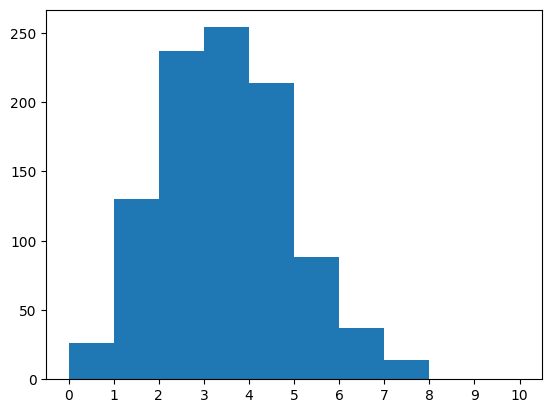

In [131]:
np.random.seed(12345)

def experiment():
    return sum(np.random.choice([1, 0], p = [0.3, 0.7], size=10))
    
simulation = [experiment() for _ in range(1000)]

axis = plt.subplot()
axis.set_xticks(range(11))
axis.hist(simulation, range(11))
plt.show()

### Bonus: Binomiale Coefficent

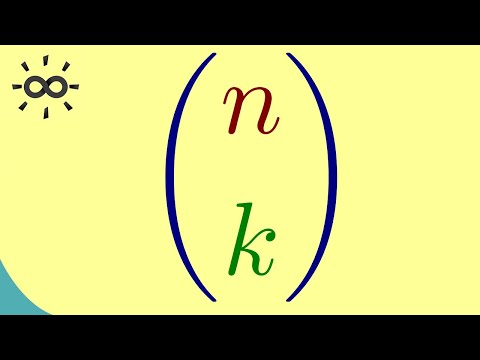

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('WHztDZECzlM', width=800, height=500)

### Geometrische Verdeling

- Herhaald experiment
- Twee mogelijke uitkomsten
- Onafhankelijk
- Wat is de kans dat het eerste succes de $n^{de}$ poging is?

Voorbeeld: Je volgt een vak dat zo moeilijk is, dat het halen van het tentamen min of meer gewoon op kans berust. Ieder jaar dat je het vak probeert, heb je een $35\%$ kans het vak te halen. **Wat is het verwachte aantal jaren dat je dit vak zal proberen (ervan uitgaande dat je de handdoek niet in de ring gooit)?**

Wederom kunnen we dit kansproces in een boom visualiseren. Ieder pad dat op een $S$ (succes) komt eindigt, je gaat tenslotte niet herkansen na een voldoende. De boom heeft de vorm van een (mogelijk eindeloze) serie $F$-en (failures), met telkens een enkele afsplitsing voor succes die daarna doodloopt.

<img style="background: white; border: 25px solid white" src="geom-tree.png" width="600px" />

$$$$

De kans dat je het vak de eerste keer haalt is $p = 0.35$. De kans dat je twee keer nodig hebt is $0.65 \times 0.35$: een failure en een succes. De kans het vak de derde keer te halen is $0.65 \times 0.65 \times 0.35$, etc. Het patroon dat duidelijk wordt is als volgt:

$P(X={\color{magenta}k}) = \color{skyblue}{(1-p)}^{\color{magenta}{k}-1} \color{red}{p}$

In [154]:
1+sum(list(itertools.takewhile(lambda x: x == 1, np.random.choice([0, 1], p=[0.35, 0.65], size = 100))))

4

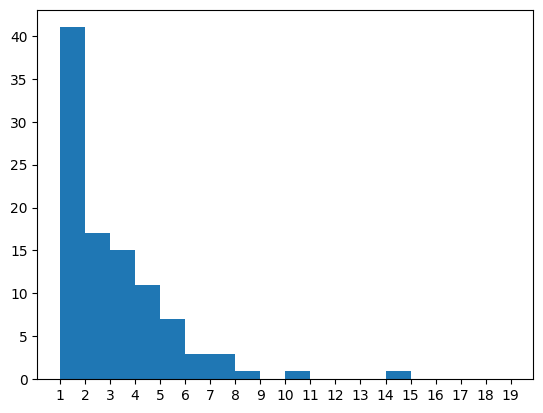

In [18]:
np.random.seed(12345)

# We keren de kansen even om: 1 voor failure en 0 voor success. 
# Dit maakt voor de simulatie niet uit, maar maakt het itereren makkelijker.

def experiment():
    return 1+sum(list(itertools.takewhile(lambda x: x == 1, np.random.choice([0, 1], p=[0.35, 0.65], size = 100))))
    
simulation = [experiment() for _ in range(100)]

axis = plt.subplot()
axis.set_xticks(range(1, 20))
axis.hist(simulation, range(1, 20))
plt.show()

#### Cumulatieve kansen

De familie de Bruijn heeft een uniek systeem om te bepalen waar ze op vakantie gaan: ze hangen de kaart van Europa aan de muur en gooien een dartpijl - waar deze landt gaan ze naartoe. Dit proces wordt twee keer per jaar herhaald vooralsnog gaat dat goed. Er is echter een $5\%$ kans dat per ongeluk de kat geraakt wordt, en de familie inziet dat dit niet de beste manier is. Wat is de kans dat de familie binnen 5 jaar (10 keer gooien) naar de dierenarts moet?

$$\begin{align*}P(X \leq 10) & = {\color{magenta}\sum_{k=1}^{10}} P(X={\color{magenta}k}) \\
& = \color{magenta}{\sum_{k=1}^{10}} \color{skyblue}{(1-p)}^{\color{magenta}{k}-1} \color{red}{p} \\
& = \color{skyblue}{0.95}^{\color{magenta}{0}} \color{red}{0.05}
 + \color{skyblue}{0.95}^{\color{magenta}{1}} \color{red}{0.05}
 + \dots
 + \color{skyblue}{0.95}^{\color{magenta}{8}} \color{red}{0.05}
 + \color{skyblue}{0.95}^{\color{magenta}{9}} \color{red}{0.05} \\
 & \approx 0.40
\end{align*}$$

Alternatief kunnen we de som oplossen met de volgende stap (voor het bewijs hiervan, zie [lemma1.md](lemma1.md) in de repository).

$$\begin{align*}P(X \leq 10) & = {\color{magenta}\sum_{k=1}^{10}} P(X={\color{magenta}k}) \\
 & = \color{magenta}{\sum_{k=1}^{10}} \color{skyblue}{(1-p)}^{\color{magenta}{k}-1} \color{red}{p} \\
 & = 1 - {\color{skyblue}(1-p)}^{10} \\
 & \approx 1 - 0.60 \\
 & \approx 0.40
\end{align*}$$

Hieronder zien we de geometrische voordeling voor deze kansen stochastisch benaderd (no actual cats were harmed in this simulation):

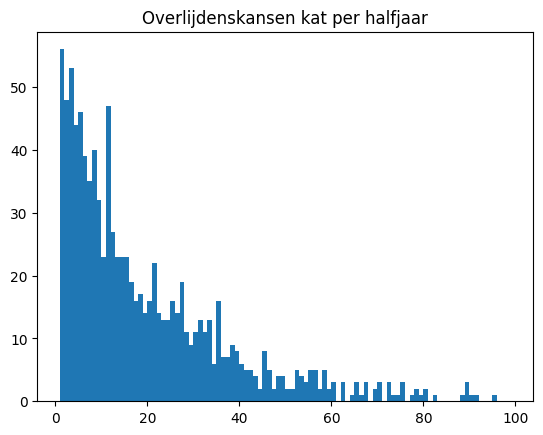

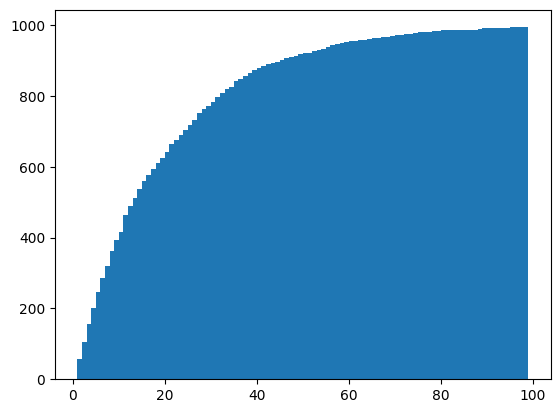

In [19]:
#np.random.seed(12345)

def experiment():
    return 1+sum(list(itertools.takewhile(lambda x: x == 1, np.random.choice([0, 1], p=[0.05, 0.95], size = 100))))
    
simulation = [experiment() for _ in range(1000)]

axis = plt.subplot()
axis.hist(simulation, range(1, 100))
axis.set_title("Overlijdenskansen kat per halfjaar")
plt.show()

cum = plt.subplot()
cum.hist(simulation, range(1, 100), cumulative=True)
axis.set_title("Totale overlijdenskansen kat per halfjaar")
plt.show()

## Oefeningen Canvas

##### Probleem 3

We rollen een dobbelsteen totdat we een waarde groter dan 4 observeren.

**Als N het totaal aantal rollen is, geef de kans P( N = k ), voor k = 1, 2, 3, ...**

$P(N = 1)$ betekent de kans dat je met één rol een 5 of hoger hebt. Kans is dus $\frac{2}{6} \approx 0.333$
$P(N = 2)$ heeft 36 equiprobable uitkomsten. De eerste worp moet $1-4$ zijn, de tweede $5–6$, dus $\frac{2}{3} \cdot \frac{1}{3} = \frac{2}{9}$
$P(N = 3)$ heeft eerst twee worpen $1-4$ (vier mogelijkheden) en dan een work $5-6$ (twee mogelijkheden). Oftewel $4 \times 4 \times 2 = 32$. Totaal aantal mogelijkheden is $6^3$, dus $\frac{2}{3} \cdot \frac{2}{3} \cdot \frac{1}{3} = \frac{2}{27}$

De algemene formule voor $P(N = k)$ is daarmee $\left(\frac{2}{3}\right)^{k-1} \cdot \frac{1}{3} =\frac{2^{k-1}}{3^k}$.

#### Probleem 4

In een examen zitten 20 multiple-choice vragen. Elke vraag heeft 4 antwoordopties. Je weet het antwoord op 10 van de vragen, maar je hebt geen idee wat het antwoord moet zijn op de overige 10 vragen. Je score X op het examen is het aantal correct beantwoordde vragen. *In de vraag staat dat de score $X$ nog door twee gedeeld moet worden, maar dan is $X>15$ niet te bereiken. Dit doen we dus even niet.*

**Teken de Probability Mass Function van X, en bepaal wat de kans $P ( X > 15 )$ is?**

$P(X = 0)$ betekent 10 vragen fout gokken.  Het totaal aantal equiprobable mogelijkheden is $4^{10}$. Het aantal "gunstige" mogelijkheden is $3^{10}$. Uitkomst is dus $\left(\frac{3}{4}\right)^{10} \approx 0.056$

$P(X = 1)$ kan ook zo verder worden opgelost, maar nu is het handig om de binomiale verdeling te gebruiken:

$$P(X = k) = \begin{pmatrix}n \\ k\end{pmatrix} \cdot \left(\frac{1}{4}\right)^k \cdot \left(\frac{3}{4}\right)^{10-k}$$

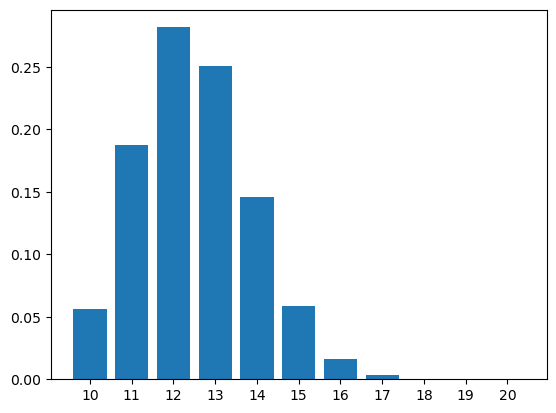

In [17]:
rs = list(range(11))
dist = [binom.pmf(r, 10, 0.25) for r in rs]

axis = plt.subplot()
axis.bar(rs, dist)
axis.set_xticks(rs)
axis.set_xticklabels(list(range(10,21)))
plt.show()

#### Probleem 5

LED-lampen worden getest op hun verwachtte levensduur. Er wordt gevonden dat 4% van de lampen niet voldoet aan de eisen van de fabrikant (deze worden afgekeurd). Als we een random sample van 15 lampen nemen en testen, laat variabele $X$ dan aangeven 'het aantal lampen dat wordt afgekeurd'.

**Geef aan waarom de variabele X een binomiale variabele is.**

Het betreft een herhaald experiment met onafhankelijke gebeurtenissen. Er zijn telkens 2 mogelijke uitkomsten en de metingen worden een vast aantal keer uitgevoerd.

**Bereken de kans dat 2 lampen uit de sample worden afgekeurd.**

$$P(X=2) = \begin{pmatrix}15\\2\end{pmatrix} \times 0.04^2 \times 0.96^{13} \approx 0.99$$

#### Probleem 6

**Als 95% van alle huishoudens een TV hebben, en 8 huizen worden onderzocht; wat is de kans dat meer dan 6 van die huishoudens een TV hebben?**

Dit is een binomiaalverdeling met $n = 8,\quad p = 0.95$. 

$$P(X=7) = \begin{pmatrix}8\\7\end{pmatrix} \times 0.95^7 \times 0.05^{1} \approx 0.99$$

$$P(X=8) = \begin{pmatrix}8\\8\end{pmatrix} \times 0.95^8 \times 0.05^{1} \approx 0.66$$

$$P(X = 7) + P(X = 8) = 0.943$$

#### Probleem 7

**Als de kans dat het gaat regenen 0.3 is, wat is dan het gemiddelde aantal dagen in een week met regen? En wat is de standaard afwijking?**

Dit is een binomiaalverdeling met $n = 7,\quad p = 0.3$. 

Het gemiddelde aantal dagen in een week met regen is de verwachtingswaarde is $E(X)$:

$$E(X) = n\cdot p = 2.1$$

De standaarddeviatie is $\sigma(X)$:

$$\sigma(X) = \sqrt{n\cdot p \cdot (1-p)} \approx 1.21$$

#### Probleem 8

**Gegeven is dat de kans dat een auto te snel rijdt als deze een flitspaal passeert gelijk is aan 0.23. Als 759 auto's voorbij die flitspaal rijden, hoeveel van de auto's verwacht je dat er te hard hebben gereden, en wat is de standaard afwijking?**

Dit is een binomiaalverdeling met $n = 759, p = 0.23$

$$E(X) = n \cdot p = 174.57$$

$$\sigma(X) = \sqrt{n\cdot p\cdot (1-p)} \approx 11.59$$

#### Probleem 9

Milani's leraar trekt random de namen van studenten, en roept deze student bij zich. Omdat ze vindt dat alle studenten altijd meteen moeten kunnen reageren, stopt ze de getrokken naam terug in de pot.

Er zijn 20 studenten in Milani's klas. Laat X de stochastische variabele zijn die het aantal namen uitdrukt die getrokken worden voordat de leraar Milani's naam trekt.

**Wat is de kans dat Milani's naam als 7de wordt getrokken (rond af op honderdsten).**

Dit is een geometrische verdeling met $p = \frac{1}{20} = 0.05$.

$$P(X = 7) = 0.95^6 \times 0.05 \approx 0.0368$$

#### Probleem 10

Fionn ziet dat 91% van de background checks die hij verwerkt van sollicitanten zijn die al eens zijn geïnterviewd. Laat B het aantal background checks zijn die Fionn verwerkt voordat hij een background check voor ogen krijgt van een kandidaat die nog niet is geïnterviewd. Neem aan dat de interview status van de kandidaten onafhankelijk is.

**Wat is de kans dat de 8st background check die Fionn uitvoert, de eerste is van een kandidaat die nog niet is geïnterviewd? (rond af op honderdsten).**

$p = 0.09$ is de kans dat een sollicitant nog niet eerder heeft gesolliciteerd.
$1-p = 0.91$ is de kans dat een sollicitant al eens eerder heeft gesolliciteerd.

$$P(X = 7) = 0.91^7 \times 0.09 \approx 0.05$$

#### Probleem 11

Een docent heeft opgemerkt dat in 84% van de papers die door zijn voormalige studenten zijn ingeleverd, de studenten incorrect hun bronnen hebben opgegeven. Hij besluit om een extra les te gaan geven over bronnen citeren, en zoekt daarvoor door zijn oude inleveringen naar een geschikt voorbeeld. Neem aan dat het incorrect citeren onafhankelijk is tussen de verschillende papers. Laat N de hoeveelheid papers zijn die de docent doorzoekt, totdat hij een geschikt voorbeeld vindt dat incorrecte bronvermelding heeft.

**Bepaal de kans dat de docent het 3de paper selecteert omdat die de eerste is met incorrecte bronvermelding? (rond af op honderdsten).**

Dit is een geometrische verdeling met $p = 0.84$

$$P(X = 3) = 0.16^2 \times 0.84 \approx 0.0215$$

# Les 8 - Poisson en Exponentiele Verdelingen

- Socrative
- Poissonverdeling
- Continue Kansen
- Exponentiele Verdeling
- CDFs
- Opdrachten Canvas

## Motivatie

- Simulatie: one day international wedstrijden
- **Mithali Raj** is een topspeler, en haalt gemiddeld 50.68 runs in een wedstrijd.
- We willen data simimuleren voor 1000 wedstrijden, zodat we op het gemiddelde uitkomen.
  - Iedere wedstrijd exact 50.68 runs?
  - 50% kans op 0, 50% kans op 101.36?
  - Wat zou een realistische kansverdeling zijn?

 $\dots$
 
- **Sophie Ecclestone** raakt per ODI gemiddeld 2 wickets. Werkt dezelfde verdeling hiervoor?

## Poissonverdeling

- Discrete distributie
- Events met een verwacht aantal voorkomens
- Hoe vaak event in een tijdsinterval

Een paramater, $\lambda$ voor gemiddelde aantal per tijdseenheid. (En tevens de variantie, dus $\sigma = \sqrt\lambda$)

$$P(X=x) = \frac{e^{-{\color{red}\lambda}}{\color{red}\lambda}^{\color{skyblue}x}}{{\color{skyblue}x}!}$$

**Voorbeeld:** Gemiddeld heeft onze webshop 1 klant per 10 minuten. Wat is de kans op 8 klanten in een uur?

$$P({\color{skyblue}X=8}, {\color{red}\lambda=6}) = \frac{e^{-{\color{red}6}}{\color{red}6}^{\color{skyblue}8}}{{\color{skyblue}8}!}$$

$$P({\color{skyblue}X=8}, {\color{red}\lambda=6}) \approx \frac{0.002478 \cdot 1679616}{40320} \approx 0.1033$$


![](poisson.gif)

- Limiet binomiaalverdeling (zie video)
- Eindeloze hoeveelheid metingen (binnen vaste timespan)
- Frequentie in plaats van binaire kans (want tijdsafhankelijk)

Zoals te zien in de voorbereidingsvideo's is de Poisson-verdeling af te leiden als de limiet van de binomiaalverdeling. Waar de binomiaalverdeling gaat over een vast aantal metingen (we gooien een kop of munt op) gaat de binomiaalverdeling over een eindeloze hoeveelheid metingen met een verwachte frequentie. Als je het aantal clicks op een website meet en vervolgens modeleert kun je dit zien alsof er iedere tijdseenheid een kans is op wel of geen click. De reden dat we de limiet van de binomiaalverdeling nemen (de Poissonverdeling dus) is dat we in een tijdsinterval oneindig veel metingen kunnen nemen.

In [41]:
@interact(λ=(1.0, 20, 0.5))
def show_poisson(λ=3):
    x = poisson.rvs(mu=λ, size=1000000)
    plt.hist(x, density=True, edgecolor='black')

interactive(children=(FloatSlider(value=3.0, description='λ', max=20.0, min=1.0, step=0.5), Output()), _dom_cl…

### Oefeningen

#### Probleem 1

Een stuntman verwond zichzelf gemiddeld drie keer per jaar. Gebruik de Poisson verdeling formule om te berekenen wat de kans is dat hij zich verwond:

- vier keer per jaar;
- minder dan twee keer per jaar;
- meer dan drie keer per jaar;
- een keer per zes maanden.

#### Probleem 2

Een boek bevat 300 pagina's en heeft 480 typefouten.

- Wat is het gemiddelde aantal fouten per pagina?


- Bepaal de kans dat een random geselecteerde pagina:
  - geen fouten bevat;  
  - precies drie fouten bevat;  
  - meer dan twee fouten bevat.
  
#### Probleem 3
Het aantal telefoontjes naar een helpdesk is Poisson verdeeld met 36 telefoontjes per 24 uur periode. Als C = het willekeurige aantal telefoontjes per uur, bepaal:

- De waarde voor $$\lambda$$
- De kans dat de helpdesk maar één telefoontje ontvangt in het eerste uur.
- De kans dat de helpdesk meer dan het gemiddelde aantal telefoontjes ontvangt in een gegeven uur.
- Het gemiddelde aantal telefoontjes per uur E(C).
- De variantie en standaard afwijking van C.

### Uitwerkingen

#### Probleem 1

Een stuntman verwond zichzelf gemiddeld drie keer per jaar. Gebruik de Poisson verdeling formule om te berekenen wat de kans is dat hij zich verwond:

- vier keer per jaar;

$$P(X=4) \approx 0.168$$

- minder dan twee keer per jaar;

$$P(X=0) + P(X=1) \approx 0.199$$

- meer dan drie keer per jaar;

$$1 - P(X=0) - P(X=1) - P(X=2) = 1 - \sum_{i=0}^2 P(X=i) \approx 0.577$$

- een keer per zes maanden.

$$P(X=2) \approx  0.224$$

#### Probleem 2

Een boek bevat 300 pagina's en heeft 480 typefouten.

- Wat is het gemiddelde aantal fouten per pagina?

$$\frac{480}{300} = 1.6$$

- Bepaal de kans dat een random geselecteerde pagina:
  - geen fouten bevat;
  
  $$P(X=0) \approx 0.202$$
  
  - precies drie fouten bevat;
  
  $$P(X=3) \approx 0.138$$
  
  - meer dan twee fouten bevat.
  
  $$1 - \sum_{i=0}^2 P(X=i) \approx 0.217$$
  

#### Probleem 3
Het aantal telefoontjes naar een helpdesk is Poisson verdeeld met 36 telefoontjes per 24 uur periode. Als C = het willekeurige aantal telefoontjes per uur, bepaal:

$$\lambda = 1.5$$

- De kans dat de helpdesk maar één telefoontje ontvangt in het eerste uur.

$$P(X=1) \approx 0.335$$

- De kans dat de helpdesk meer dan het gemiddelde aantal telefoontjes ontvangt in een gegeven uur.

$$1 - \sum_{i=0}^1 P(X=i) \approx 0.442 $$

- Het gemiddelde aantal telefoontjes per uur E(C).

$$E(C) = \lambda = 1.5$$

- De variantie en standaard afwijking van C.

$$Var(C) = \lambda = 1.5, \quad \sigma(C) = \sqrt\lambda \approx 1.225$$

## Exponentiele verdeling

- Continue distributie
- Rate waarin events voorkomen
- Hoe groot is de kans dat event voorkomt binnen $0 < t < X$
- Vergelijkbaar met geometrische distributie, maar dan continu

Een paramater, $\lambda$ voor gemiddelde event-rate.

$$P(X=x) = {\color{red}\lambda} e^{-{\color{red}\lambda} x}$$

### Cummulative Distribution Function (CDF)
- So far: $\Sigma$ over de PDF (Probability Density Function)
- Leuk voor discrete distributies
- Continue distributies $\to$ integraal.

#### Oefening: bepaal de CDF
- Neem de integraal m.b.t. $x$, beschouw $\lambda$ als constant.

  $$\begin{align*}  P(X \leq x) &= \int_0^x {\color{red} \lambda} e^{-\lambda x}\ dx \\[2mm]
  &= {\color{red} -} \int_0^x e^{-\lambda x} {\color{red} - \lambda}\ dx\\[2mm]
  &= - \int_0^{-\frac{u}{\lambda}} e^{\color{skyblue}u}\ {\color{darkgreen} du} \qquad \text{ met}\quad u = {\color{skyblue}-\lambda x} \quad\text{en}\quad \frac{du}{dx} = -\lambda \quad\to\quad du = {\color{darkgreen}-\lambda\ dx}\\[2mm]
  &= -e ^{u} \bigg\rvert_0^{-\frac{u}{\lambda}} \\[2mm]
  &= -e ^{-\lambda x} \bigg\rvert_0^x \\[2mm]
  &= -e^{-\lambda x} - (-e^0) \\[2mm]
  &= 1 - e^{-\lambda x} \end{align*}$$

### Voorbeeld
Je neemt deel aan een sneeuwballengevecht, waarbij je met een rate van 1 sneeuwbal per 3 minuten getarget wordt. Wat is de kans dat je 2 minuten adempauze hebt?

$$P({\color{skyblue}X>2}, {\color{red}\lambda=\frac{1}{3}}) = 1 - P({\color{skyblue}X<2}, {\color{red}\lambda=0.3})$$
$$1 - P({\color{skyblue}X<2}, {\color{red}\lambda=\frac{1}{3}}) = 1 - (1 - e^{-{\color{red}\frac{1}{3}} \cdot {\color{skyblue}2}}) = e^{-\frac{2}{3}}  \approx 0.5134$$

Bruikbaar voor:
- Kans event voor een punt $X<t$
- Kans event na een punt $X>t$ (door middel van $1 - P(t)$)
- Kans event tussen twee waardes $t_1 < X < t_2$ (door middel van $P(t_2) - P(t_1)$)

In [23]:
@interact(λ=(0.1, 5, 0.01))

def exponential_distro(λ = 0.3):
    xs = np.arange(0,10,0.1)
    ys = [λ * np.e ** (- λ * x) for x in xs]
    plt.plot(xs,ys, 'r')
    plt.show()

interactive(children=(FloatSlider(value=0.3, description='λ', max=5.0, min=0.1, step=0.01), Output()), _dom_cl…

### Oefeningen
#### Probleem 4

Laat X een stochastische variabele zijn met een exponentiële verdeling ($\lambda = \ln(3)$). Bereken de kans dat X een waarde heeft tussen 2 en 4.

#### Probleem 5

De hoeveelheid tijd die echtgenoten spenderen aan het winkelen voor een jubileumkaart wordt gemodelleerd door een exponentiële verdeling waarbij de gemiddelde tijd gelijk is aan acht minuten. Geef de verdeling, de probability density function en teken de grafiek van de verdeling.

#### Probleem 6

Het aantal dagen dat een reiziger hun vliegtickets vooruit koopt, kan worden gemodelleerd door een exponentiële verdeling waarbij de gemiddelde tijd gelijk is aan 15 dagen. Bepaal de kans dat een reiziger minder dan 10 dagen van tevoren een ticket koopt. Hoeveel dagen wacht de helft van alle reizigers?

### Uitwerkingen

#### Probleem 4

Laat X een stochastische variabele zijn met een exponentiële verdeling ($\lambda = \ln(3)$). Bereken de kans dat X een waarde heeft tussen 2 en 4.

$$\begin{align*} P(2 < X < 4) &= \left( 1-e^{-4\ln(3)} \right) - \left( 1-e^{-2\ln(3)} \right) \\
&= \left(-e^{-4\ln(3)}\right) - \left(-e^{-2\ln(3)}\right) \\ &= e^{-2\ln(3)} - e^{-4\ln(3)} \\ 
&= (e^{\ln(3)})^{-2} - (e^{\ln(3)})^{-4} \\ &= 3^{-2} - 3^{-4} \\
&= \frac{1}{9} - \frac{1}{81}\\ &= \frac{8}{81} \\ &= \approx 0.099\end{align*}$$

#### Probleem 5

De hoeveelheid tijd die echtgenoten spenderen aan het winkelen voor een jubileumkaart wordt gemodelleerd door een exponentiële verdeling waarbij de gemiddelde tijd gelijk is aan acht minuten. Geef de verdeling, de probability density function en teken de grafiek van de verdeling.

$$E(X) = 8,\quad \lambda = \frac{1}{8}, \quad P(X) = \frac{1}{8} e^{-\frac{1}{8}x}$$

#### Probleem 6

Het aantal dagen dat een reiziger hun vliegtickets vooruit koopt, kan worden gemodelleerd door een exponentiële verdeling waarbij de gemiddelde tijd gelijk is aan 15 dagen. Bepaal de kans dat een reiziger minder dan 10 dagen van tevoren een ticket koopt. Hoeveel dagen wacht de helft van alle reizigers?

$$E(X) = 15,\quad\lambda=\frac{1}{15},\quad P(X<10) = 1 - e^{-\frac{2}{3}} \approx 0.487$$

**Mediaan:**

De integraal van 0 naar $m$ van de PDF moet $\frac12$ zijn. Oplossen geeft $m = 15 \ln(2)$:

$$\begin{align*}\frac{1}{2} &= \left( 1-e^{-\lambda x_2} \right) - \left( 1-e^{-\lambda x_1} \right) \\
&= \left( 1-e^{-\frac{x}{15} } \right) - \left( 1-e^{-\frac{0}{15} } \right) \\
&= \left( 1-e^{-\frac{x}{15} } \right) - \left( 1-1 \right) \\
&= 1-e^{-\frac{x}{15} } \\[4mm]
e^{-\frac{x}{15}} &= \frac{1}{2} \\[2mm]
\ln(e^{-\frac{x}{15}}) &= \ln\left(\frac{1}{2}\right) \\[2mm]
-\frac{x}{15} &= \ln\left(\frac{1}{2}\right) \\[2mm]
x &= -15\ln\left(\frac{1}{2}\right) \\
&= 15\ln(2) \\
\end{align*}$$

## Programmeeropdrachten

#### Opgave 1
Simuleer met behulp van de computer het aantal telefoontjes dat iemand op een dag ontvangt. Per dag komen er gemiddeld 3 telefoontjes langs. Simuleer een jaar deze persoon. In hoeveel dagen was het aantal telefoontjes 5 of meer in jouw simulatie?

In [43]:
np.random.seed(12345)



De kans op 5 of meer telefoontjes is:  0.18473675547622792
Het aantal dagen met 5 of meer telefoontjes is:  62


#### Opgave 2

We gaan 1.000 getallen genereren van een expontiële verdeling. We maken daarbij bewust geen gebruik van `numpy.random.exponential`. We willen laten zien dat je ook met uniforme random getallen (`numpy.random.random`) alle andere verdelingen kunt genereren. Doorloop de volgende stappen:

- We nemen aan dat het gemiddelde van onze 1.000 random getallen 3 is. Leid hieruit af wat de parameter $\lambda$ van de exponentiële verdeling is.

- Nu je de parameter $\lambda$ weet, kun je de functie van de cdf van een exponentiële verdeling opschrijven. Als je niet weet wat de formule is, kun je bijvoorbeeld kijken op [Wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution). Maak een plaatje van de cdf. Als je het goed hebt gedaan krijg je een grafiek die links bij 0 begint en dan stijgt naar de waarde 1.

- Genereer nu 1.000 uniform random getallen tussen 0 en 1 met behulp van `np.random.random`.

- Nu willen we de 1.000 getallen van het vorige onderdeel transformeren naar 1.000 random getallen die uit de exponentiële verdeling komen. Dit gaat als volgt, zie ook het plaatje hieronder. Neem eerst een uniform random getal uit de net gegenereerde set. Bij mij is dit $0.493$, maar bij jullie zal dit iets anders zijn. Vervolgens zoek je dit punt op op de y-as van de cdf die je gemaakt hebt bij het tweede punt. Dan ga je van daar uit naar rechts, totdat je bij de lijn van de grafiek van de cdf uitkomt. Hier ga je recht naar beneden, zie plaatje hieronder (alleen staat in dit plaatje de cdf van de normale verdeling en moet je zelf de cdf nemen van eerder). Het getal waar je dan uitkomt op de x-as is het getal dat verdeeld is volgens de gezochte verdeling. Op deze manier ga je alle 1.000 getallen langs.

![](cumulative.png)

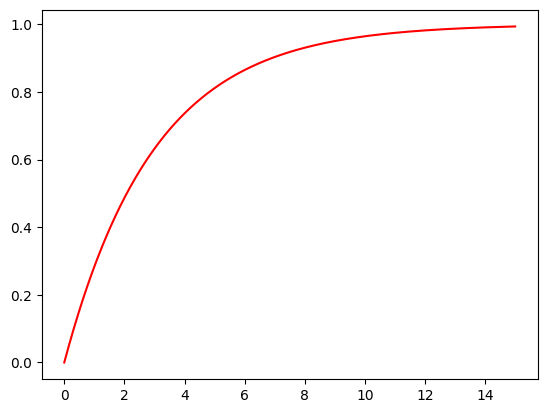

In [3]:
import bisect # Gebruikt om snel een benaderde x-waarde bij een y-waarde te zoeken

# Berekende lambda
λ = 1/3

# Formules voor de PDF en CDF
pdf = lambda x: λ * np.e ** (-λ * x)
cdf = lambda x: 1 - np.e ** (-λ * x)

# Genereer 3000 getallen met een stepsize van 0.005, en bereken de bijbehorende y in de CDF 
xs = np.arange(0,15,0.005)
ys = [cdf(x) for x in xs]

# Gebruik xs en ys om de grafiek van de CDF te plotten
plt.plot(xs,ys, 'r')
plt.show()

# Genereeer 1000 random getallen uit een uniforme verdeling
res = []
for r in np.random.random(1000):
    # Zoek elk random getal op de y-as en sla de bijbehorende x-waarde op
    res.append(xs[bisect.bisect(ys, r)-1])

# Plot het resultaat van onze simulatie in een histogram.
plt.hist(res, density=True, edgecolor='black')
plt.show()

# Les 9 - Monte Carlo en RNG

- Socrative
- Monte Carlo Simulation
- Random Number Generators
  - Middle Square (demo)
  - LCG, LFG
  - Mersenne Twister
- Final Assignment

## Monte Carlo Simulatie
- Demo met $\pi$
- Machine Onderhoud
    - Simulatie van een individuele dag met kansverdelingen
    - Herhaald experiment
    - Aggregatie van de resultaten 

## Random Number Generators
- Definieert een eindeloze serie (integer) getallen
- Start vanaf een (integer) seed waarde
- Idealiter: zo min mogeijk cycli
- Idealiter: zo min mogelijk zichtbaar patroon
- Inherent stateful: object of coroutine
    - `init(seed)` / `reset(seed)`
    - `next()` functie

### Middle Square
    seed   =   2339
    square = 05470921
    new    =   4709
    

### Linear Congruential Generator
$$S_n = (aS_{n-1} + c) \mod m, \quad\text{ where }\quad a, c \in \mathbb{N_1}$$

### Lagged Fibonacci Generator
$$S_n = S_{n-j} \star S_{n-k} \mod m, \quad\text{ where }\quad j, k \in \mathbb{N_1},\quad 0 < j < k,\quad \star \in \{ +, -, \times, \oplus \}$$

### Mersenne Twister
- Opereert op een blok van bit-vectoren
  - Seeded met een blok
    - Vullen vanaf een seed-value m.b.v. meer primitieve generator
  - Produceert random waardes uit blok
  - Reproduceert blok indien nodig

In [55]:
class MidSquareGen(object):   # Algemene opzet voor een RNG object: init, en next. Optioneel (re)set seed.
    def __init__(self, seed):
        self.seed = seed
        
    def reset(self, seed):
        self.seed = seed
        
    def next(self):
        self.seed = MidSquareGen.select_middle(self.seed**2, 4) # Bereken volgende seed (en bewaar die)
        return self.seed / 10000.0                 # Bereken waarde uit seed (kan de geschaalde seed zijn, of een complexere functie)

    @staticmethod
    def select_middle(number, positions):       # Statische helperfunctie
        left = True
        while len(str(number)) > positions:
            if left: 
                number = int(str(number)[1:])
                left = False
            else:
                number = int(str(number)[:-1])
                left = True
        return number
    
rng = MidSquareGen(12345)

print([rng.next() for _ in range(20)])

# Neem tweemaal een random getal met steeds dezelfde seed
rng.reset(12345)
a = rng.next()
rng.reset(12345)
b = rng.next()
print(a == b) # Deze moeten gelijk zijn

[0.399, 0.9201, 0.6584, 0.349, 0.1801, 0.436, 0.096, 0.216, 0.656, 0.336, 0.2896, 0.8681, 0.3597, 0.9384, 0.5945, 0.343, 0.7649, 0.5072, 0.7251, 0.577]
True
